# **타이타닉 데이터 실습**

## 1. 데이터 로딩

In [115]:
# 사용 패키지 불러오기
import pandas as pd # 판다스
from sklearn.model_selection import train_test_split # 훈련/테스트 세트 분리
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # LR
from sklearn.metrics import accuracy_score # 정확도
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # 정확도, 혼동행렬 
import seaborn as sns # 시본
from sklearn.preprocessing import LabelEncoder # 엔코딩
import matplotlib.pyplot as plt # 맷플롯립

In [72]:
# 데이터 불러오기(url)
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
titan = pd.read_csv(url)

In [73]:
# 데이터 변수 확인
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
# 데이터 변수명 확인
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
# 데이터 첫 5행
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 결측치 확인

In [76]:
titan.isnull().sum() # Age : 177개, Cabin : 687개, Embarked : 2개 존재

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 결측치 제거(Age인 경우 평균 나이로 대체)

In [86]:
titan["Age"] = pd.to_numeric(titan["Age"], errors="coerce")  # 숫자로 변환, 변환 불가능한 값은 NaN으로 변경

In [87]:
titan["Age"] = titan["Age"].fillna(titan["Age"].mean()) # Age 변수의 결측치를 평균값으로 체체

In [118]:
titan["Age"].dtype # 실수형으로 변환
titan["Age"].head() 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [90]:
titan.isnull().sum() # Age 변수의 결측치가 없음.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. 레이블 확인(불균형 데이터)

In [117]:
titan['Survived'].value_counts() # 반응변수이자 범주형 변수인 생존여부는 사망자(0)가 생존자(1)에 비해 많음(클래스 불균형).

Survived
0    549
1    342
Name: count, dtype: int64

## 5. 불필요한 컬럼 제거

In [94]:
# 분석에서 사용하지 않는 변수 제거(승객ID, 이름, 티켓 번호, 객실 번호, 기항지 위치)
titanic = titan.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [119]:
# 변수명 확인
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## 6. 엔코딩(숫자)

In [120]:
# 범주형 변수인 Sex(성별) 변수를 원-핫인코딩
encoder = LabelEncoder() # LabelEncoder 객체 생성
titanic["Sex"] = encoder.fit_transform(titanic["Sex"]) # 성별 변수를 숫자로 변환
print(titanic[["Sex"]].head())
# 남자 : 1, 여자 : 0

   Sex
0    1
1    0
2    0
3    0
4    1


## 7. 분류(RF, DT, LR, KNN, SVM)

In [97]:
# 훈련 세트 & 테스트 세트 분할(8:2)
X = titanic.drop(columns=['Survived'])  # 타겟 변수 : 'Survived' (생존여부)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
# 표준화(For SVM, LR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

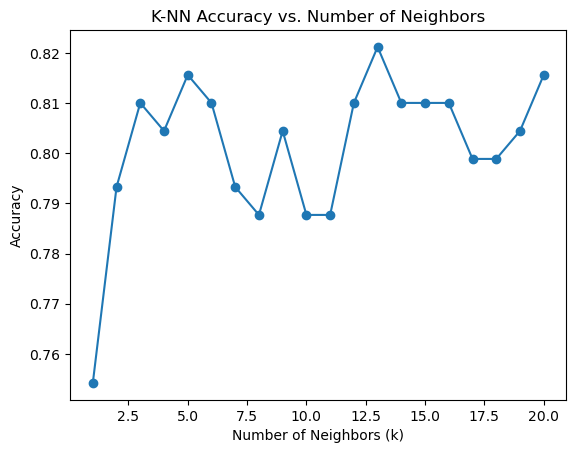

In [110]:
# 최적의 k값 찾기(KNN)
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs. Number of Neighbors")
plt.show()

# k=13일 때 가장 높은 정확도를 보임.

In [121]:
# 모델 : 의사결정나무(DT), 랜덤포레스트(RF), 서포트벡터머신(SVM), 로지스틱선형회귀(LR), K-최근접이웃(KNN)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=13)
}

## 8. 정확도 및 혼동행렬

Decision Tree Accuracy: 0.8045
Decision Tree Confusion Matrix:
[[94 16]
 [19 50]]



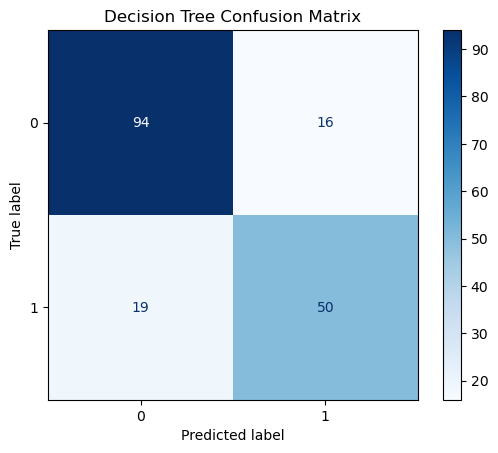

Random Forest Accuracy: 0.8212
Random Forest Confusion Matrix:
[[96 14]
 [18 51]]



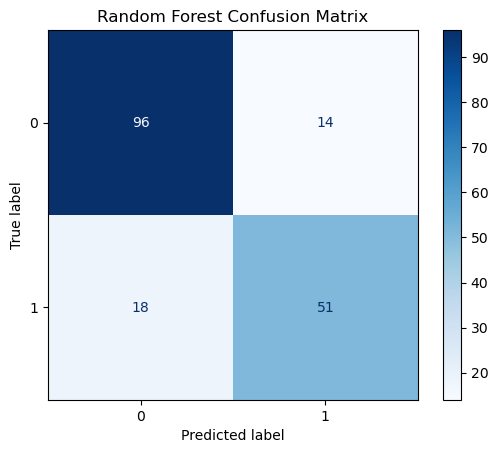

SVM Accuracy: 0.7765
SVM Confusion Matrix:
[[94 16]
 [24 45]]



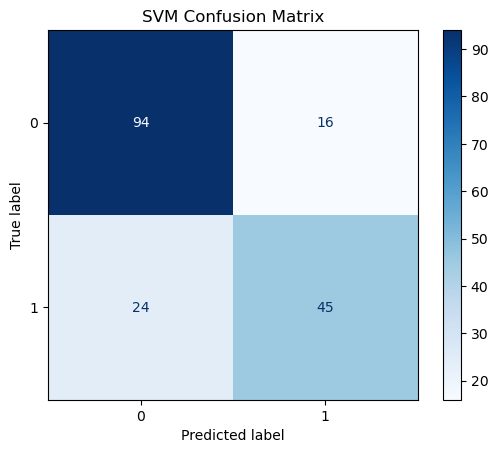

Logistic Regression Accuracy: 0.8101
Logistic Regression Confusion Matrix:
[[97 13]
 [21 48]]



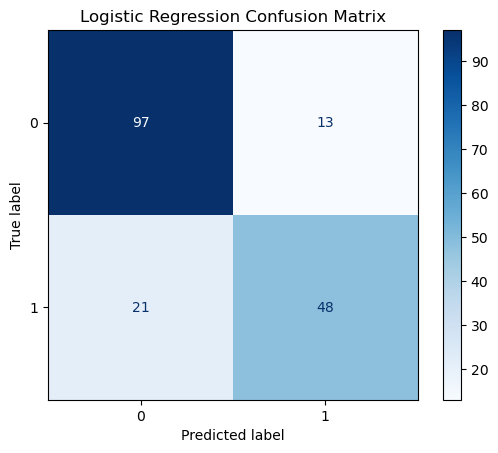

KNN Accuracy: 0.8212
KNN Confusion Matrix:
[[100  10]
 [ 22  47]]



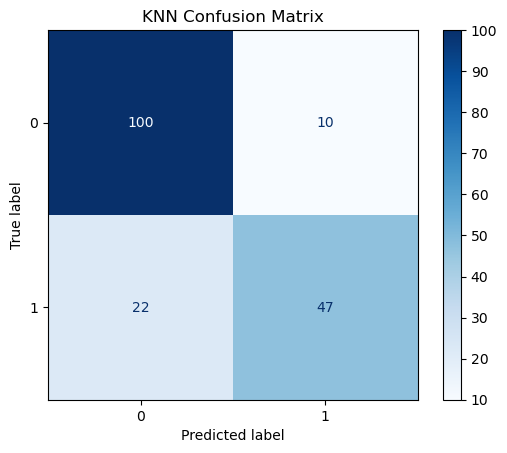

In [122]:
# 모델 학습 및 평가(정확도, 혼동행렬)
for name, model in models.items():
    if name in ["SVM", "Logistic Regression", "KNN"]:  
        model.fit(X_train_scaled, y_train)  # 🔹 SVM, LR, KNN은 표준화 데이터 사용
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # 🔹 DT, RF는 원본 데이터 사용
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) # 정확도
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    cm = confusion_matrix(y_test, y_pred) # 혼동행렬
    print(f"{name} Confusion Matrix:\n{cm}\n")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # 혼동행렬 시각화
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [ ]:
# 결론 : 5개의 모델 모두 정확도가 약 77~82% 사이의 값으로 매우 높지는 않은 것으로 보아 반응변수의 클래스 불균형 때문으로 보임.